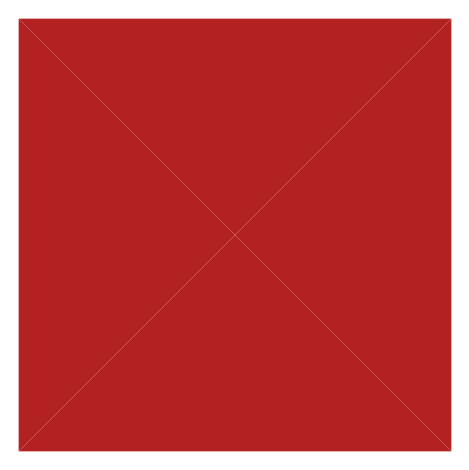

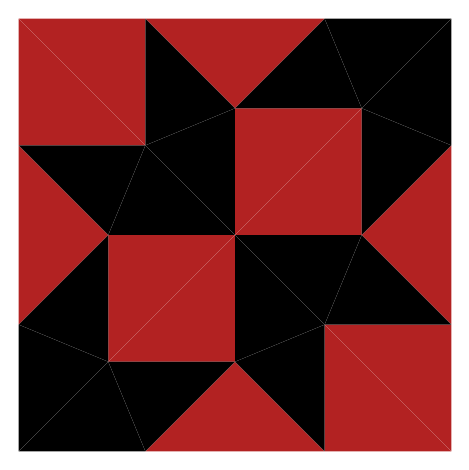

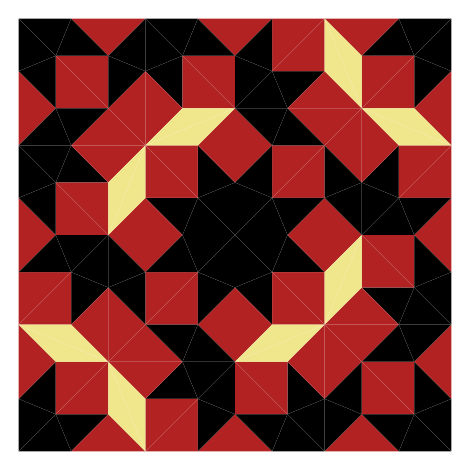

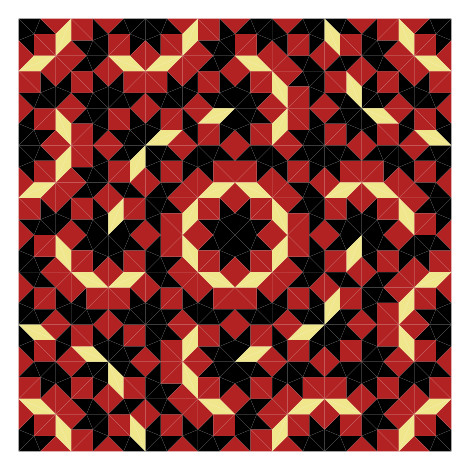

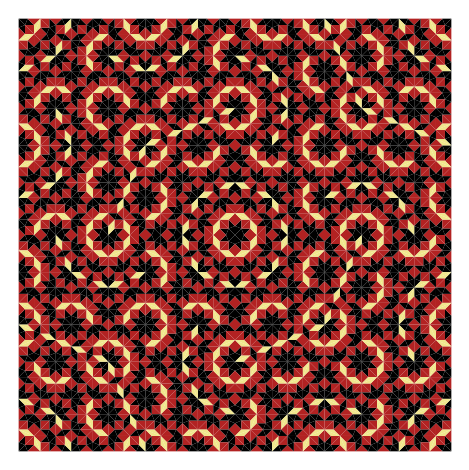

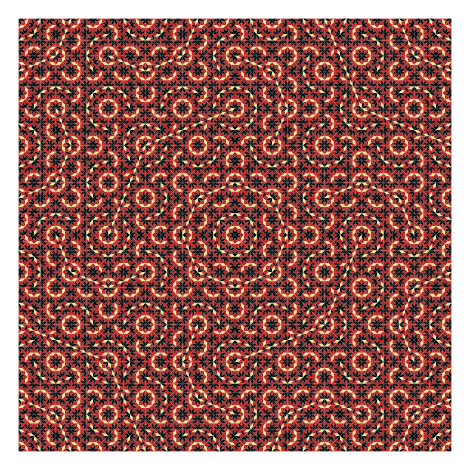

In [4]:
golden_ratio = 2.4142
r2 = 1.4142
rr = golden_ratio/r2

def subdivide(triangles):
    result = []
    for color, A, B, C in triangles:
        if color == 0:
            # Subdivide green triangle
            P =  (A[0] + (B[0] - A[0])/ golden_ratio , A[1] + (B[1] - A[1])/ golden_ratio) 
            O =  (A[0] + (C[0] - A[0])/ golden_ratio , A[1] + (C[1] - A[1])/ golden_ratio)
            result += [(0, A, P, O), (0, (P[0]+O[0] - A[0] , P[1]+O[1] - A[1]), O, P), (1, (P[0]+O[0] -A[0], P[1]+O[1] -A[1]), P, B), (1, (P[0]+O[0] -A[0], P[1]+O[1] -A[1]), O, C), (2, (P[0]+O[0] - A[0] , P[1]+O[1] - A[1]), B, C) ]
        else:
            if color == 1:   
                Q = (A[0] + (B[0] - A[0])/ golden_ratio , A[1] + (B[1] - A[1])/ golden_ratio) 
                S =  (C[0] - (C[0] - A[0])/ golden_ratio , C[1] - (C[1] - A[1])/ golden_ratio)
                T = (B[0] + (C[0] - B[0])/ (1 + golden_ratio), B[1] + (C[1] - B[1])/ (1 + golden_ratio)  )
                Y = (C[0] + (B[0] - C[0])/ (1 + golden_ratio), C[1] + (B[1] - C[1])/ (1 + golden_ratio)  )
                U = (A[0] + (C[0] - A[0] + B[0] - A[0])/(1 + golden_ratio),  A[1] + (C[1] - A[1] + B[1] - A[1])/(1 + golden_ratio) )
                result += [(1, U, S, A), (1, U, Y, T), (1, T, Q, B), (0, A, Q, U), (0, T, U, Q), (0, U, Y, S), (0, C, S, Y)]
            else:
             # Subdivide cachito
                M = (A[0] + (B[0] - A[0])/ rr , A[1] + (B[1] - A[1])/ rr) 
                N = (A[0] + (C[0] - A[0])/ rr , A[1] + (C[1] - A[1])/ rr )
                V = (C[0] + (B[0] - C[0])/ golden_ratio, C[1] + (B[1] - C[1])/ golden_ratio)
                X = (B[0] + (C[0] - B[0])/ golden_ratio, B[1] + (C[1] - B[1])/ golden_ratio)
                result += [(2, M, B, X), (2, N, V, C), (1, X, M, A), (1, V, N, A), (0, A, X, V)]
    return result


# Create wheel of red triangles around the origin
triangles = []
for i in range(4):
    B = (cos((2*i - 1)*pi/4), sin((2*i - 1)*pi/4))
    C = (cos((2*i + 1)*pi/4), sin((2*i + 1)*pi/4))
    if i % 2 == 1:
        B, C = C, B  # Make sure to mirror every second triangle
    triangles.append((1,(0,0),B,C))

# Draw n iterates
n = 4
for i in range(n): 
    P = Graphics()
    for verts in triangles:
        P += polygon([(z[0], z[1]) for z in (verts[1:])], color=['black', 'firebrick', 'khaki'][verts[0]])
        # P += line([(z[0], z[1]) for z in (verts[3]), (verts[1]), (verts[2])], color='black', thickness=.5)
        #if z[0] >= 0:
         #   P += line([(z[0],z[1]) for z in (verts[2]),(verts[3])], color='black', thickness = 0.8, linestyle=':')
    P.show(axes=False, aspect_ratio=1)
    triangles = subdivide(triangles)